In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from os.path import join

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical

In [3]:
datax = np.load(join('data', 'MNIST.npy'))
datay = np.load(join('data', 'Label.npy'))

In [4]:
datax_norm = datax/255
print('최대: {}, 최소: {}'.format(np.max(datax_norm), np.min(datax_norm)))

최대: 1.0, 최소: 0.0


In [5]:
datax_reshape = datax_norm.reshape([60000,28*28])

In [8]:
## input
input_shape = (28*28,)
input_tensor = layers.Input(input_shape)

## Encoder
encoder1 = layers.Dense(500, activation = 'relu')(input_tensor)
encoder2 = layers.Dense(300, activation = 'relu')(encoder1)
encoder3 = layers.Dense(100, activation = 'relu')(encoder2)

latent_tensor = encoder3

## Decoder
decoder1 = layers.Dense(300, activation='relu')(latent_tensor)
decoder2 = layers.Dense(500, activation='relu')(decoder1)

## Outputs
reconstruction_output = layers.Dense(28*28, activation='relu')(decoder2)


In [10]:
ae = models.Model(input_tensor, reconstruction_output)
ae.compile(optimizer = 'Adam', loss = 'mse')

In [12]:
ae.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 500)               392500    
                                                                 
 dense_5 (Dense)             (None, 300)               150300    
                                                                 
 dense_6 (Dense)             (None, 100)               30100     
                                                                 
 dense_7 (Dense)             (None, 300)               30300     
                                                                 
 dense_8 (Dense)             (None, 500)               150500    
                                                                 
 dense_9 (Dense)             (None, 784)               392784

In [19]:
epoch = 10
batch_size = 1024

ae.fit(datax_reshape, datax_reshape,
      batch_size = batch_size,
      epochs=epoch,
      verbose =2)

Epoch 1/10
59/59 - 2s - loss: 0.0091 - 2s/epoch - 31ms/step
Epoch 2/10
59/59 - 2s - loss: 0.0089 - 2s/epoch - 29ms/step
Epoch 3/10
59/59 - 2s - loss: 0.0086 - 2s/epoch - 30ms/step
Epoch 4/10
59/59 - 2s - loss: 0.0084 - 2s/epoch - 31ms/step
Epoch 5/10
59/59 - 2s - loss: 0.0082 - 2s/epoch - 32ms/step
Epoch 6/10
59/59 - 2s - loss: 0.0082 - 2s/epoch - 35ms/step
Epoch 7/10
59/59 - 2s - loss: 0.0080 - 2s/epoch - 34ms/step
Epoch 8/10
59/59 - 2s - loss: 0.0079 - 2s/epoch - 34ms/step
Epoch 9/10
59/59 - 2s - loss: 0.0078 - 2s/epoch - 35ms/step
Epoch 10/10
59/59 - 2s - loss: 0.0077 - 2s/epoch - 36ms/step


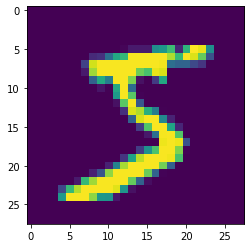

In [20]:
# 원본 데이터 확인
plt.imshow(datax_reshape[0].reshape(28,28))

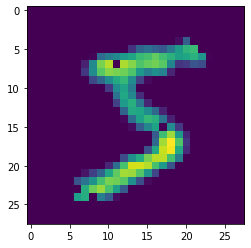

In [23]:
# 데이터를 모델에 넣고 복원시킨다
decoded_img = ae.predict(datax_reshape[0].reshape(1,28*28))
decoded_img = decoded_img.reshape(28,28)

# 복원된 데이터 확인
plt.imshow(decoded_img)

In [24]:
np.mean(np.abs(datax_reshape[0] - decoded_img.reshape(784,1)))

0.22679925493256167

In [25]:
random_vector = np.random.rand(784,1)

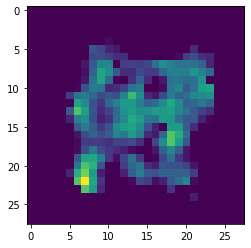

In [26]:
# 데이터를 모델에 넣고 복원시킴
decoded_img = ae.predict(random_vector.reshape(1,28*28))
decoded_img = decoded_img.reshape(28,28)

# 복원된 데이터 확인
plt.imshow(decoded_img)

In [27]:
np.mean(np.abs(random_vector - decoded_img.reshape(784,1)))

0.4363685779686767

In [28]:
datax_reshape = datax_norm.reshape((-1,28,28,1))
print('최대: {}, 최소: {}'.format(np.max(datax_norm), np.min(datax_norm)))

최대: 1.0, 최소: 0.0


In [29]:
## Input
input_shape = (28,28,1)
input_tensor = layers.Input(input_shape)

## Encoder
conv1 = layers.Conv2D(1,(3,3), padding='same', activation='relu')(input_tensor)
pooling1 = layers.MaxPool2D(name='imlatent_layer')(conv1)

flatten1 = layers.Flatten()(pooling1)
dense1 = layers.Dense(100,activation='relu', name='latent_layer')(flatten1)

latent_tensor = dense1

## Decoding

dense2 = layers.Dense(14*14, activation='relu')(latent_tensor)
reshaped = tf.reshape(dense2, [-1,14,14,1])

upsample2 = layers.UpSampling2D()(reshaped)
deconv2 = layers.Conv2DTranspose(1,(3,3), padding = 'same', activation='sigmoid')(upsample2)

# Outputs
output_tensor = deconv2


In [30]:
ae = models.Model(input_tensor, output_tensor)
ae.compile(optimizer = 'Adam', loss = 'mse')

In [31]:
ae.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 1)         10        
                                                                 
 imlatent_layer (MaxPooling2  (None, 14, 14, 1)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 196)               0         
                                                                 
 latent_layer (Dense)        (None, 100)               19700     
                                                                 
 dense_10 (Dense)            (None, 196)               19796     
                                                           

In [32]:
epoch=10
batch_size=1024

ae.fit(datax_reshape, datax_reshape,
      batch_size=batch_size,
      epochs=epoch,
      verbose=2)

Epoch 1/10
59/59 - 6s - loss: 0.1674 - 6s/epoch - 101ms/step
Epoch 2/10
59/59 - 6s - loss: 0.0723 - 6s/epoch - 104ms/step
Epoch 3/10
59/59 - 7s - loss: 0.0629 - 7s/epoch - 117ms/step
Epoch 4/10
59/59 - 7s - loss: 0.0557 - 7s/epoch - 123ms/step
Epoch 5/10
59/59 - 7s - loss: 0.0508 - 7s/epoch - 121ms/step
Epoch 6/10
59/59 - 8s - loss: 0.0468 - 8s/epoch - 129ms/step
Epoch 7/10
59/59 - 8s - loss: 0.0434 - 8s/epoch - 128ms/step
Epoch 8/10
59/59 - 8s - loss: 0.0407 - 8s/epoch - 129ms/step
Epoch 9/10
59/59 - 8s - loss: 0.0385 - 8s/epoch - 129ms/step
Epoch 10/10
59/59 - 8s - loss: 0.0367 - 8s/epoch - 133ms/step


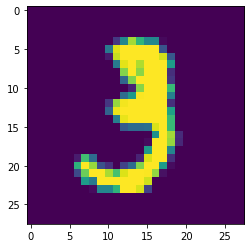

In [33]:
# 원본 데이터 확인
plt.imshow(datax_reshape[10].reshape(28,28))

In [34]:
datax_reshape[10].shape

(28, 28, 1)

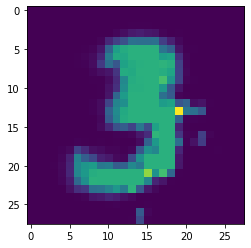

In [36]:
# 데이터를 모델에 넣고 복원시킴
decoded_img = ae.predict(datax_reshape[10].reshape(1,28,28,1))
decoded_img = decoded_img.reshape(28,28)

# 복원된 데이터 확인
plt.imshow(decoded_img)

In [38]:
intermediate_layer_model = models.Model(inputs=ae.input,
                                       outputs = ae.get_layer('imlatent_layer').output)
intermediate_output = intermediate_layer_model.predict(datax_reshape[10].reshape(1,28,28,1))

In [39]:
latent_vector = np.array(intermediate_output)

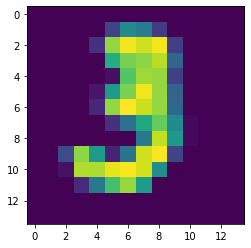

In [40]:
plt.imshow(latent_vector.reshape(14,14))